# AML Assignment 2

## Supreet Singh - CS16BTECH11038

(Done in Python 3)

** NEED TO INSTALL MATPLOTLIB ** for Q6, part (c)

# Q1


## (a) 

Using Mercer's Condition, 

$  K(x,z) = K1(x,z) + K2(x,z) $ has to be positive semidefinite, i.e. Integral (dx.dz. f(x).K(x,z).f(z)) >= 0.

Since this condition is true for K1 and K2, it is also true for K1+K2 (simply add those two to get the required inequality). Hence, this K is a valid kernal function.

## (b)
K(x,z) = K1(x,z) . K2(x,z)

Let $ K1(x, z) = \phi_1(x) . \phi_1(z) $ 

 $ K2(x, z) = \phi_2(x) . \phi_2(z) $ 
 
Then: (x, z are vectors)

$$ K1 . K2 = (\sum_i \phi_1(x_i).\phi_1(z_i)) . (\sum_j \phi_2(x_j).\phi_2(z_j)) $$

_note: Here $ \phi_1(x_i) $ denotes i'th component of $ \phi_1(x) $ _

Which is equal to: 

$$ K1. K2 = \sum_{i, j} \phi_1(x_i).\phi_2(x_j) . \phi_1(z_i).\phi_2(z_j) $$

Set a new $$ \phi_3(x_k) = \phi_1(x_i).\phi_2(x_j) $$ (similarly for z).

We get, $$ K(x,z) = K1 . K2 = \sum_k \phi_3(x_k) . \phi_3(z_k) = \phi_3(x) . \phi_3(z) $$

 **Hence, this K is decomposable into a dot product, and is a valid Kernel. **

## (c)
K(x,z) = h(K1(x,z))

Using Mercer's Condition,

$$ \int dx.dz.f(x). K1(x,z) . f(z) \ge 0 $$

for any f(x) satisfying the criteria of Mercer's condition.

$$ (\forall a_i > 0 ): $$  

$$ \implies a_i \int dx.dz.f(x). K1(x,z) . f(z) \ge 0 $$



$$ \implies \int dx.dz.f(x). a_i . K1(x,z) . f(z) \ge 0 $$

$$ \implies \int dx.dz.f(x). h(K1(x,z) . f(z) \ge 0 $$

where $$ h(K1) = a_0 + a_1 . K1 + a_2. K1^2 + ... $$ is a polynomial with positive coeffecients  $(a_i > 0 ) $ (Using (a) part for addition of kernel functions resulting in valid kernel function)

Thus, ** This is a valid kernel ** because it satisfies mercer's condition.

## (d)

K(x,z) = $ e^ {K1(x,z)} $

$ e^{K1(x,z)} $  can be approximated to a polynomial of K1(x,z) using Taylor Series:

$ e^x = 1 + x + \frac{x^2}{2!} + ... $

In part(c), it has been shown that a polynomial function of a valid kernel is also a valid kernel. 

Thus, **this is also a valid kernel.**

## (e)
K(x, z) = exp ($\frac{-||x - z||^2}{\sigma^2} $)

It is known that K1(x,z) = exp ($\frac{-||x - z||^2}{2.\sigma^2} $) is a valid kernel (mentioned in slides).

$ K(x,z) = (K1(x,z))^2$.

Thus, using part (b), ** this is also a valid kernel. **

# Q2


# Q3


# Q4

In [2]:
# Loading Data!
import numpy as np
import urllib.request

# Open the url for reading
f1 = urllib.request.urlopen("http://www.amlbook.com/data/zip/features.train")
# fast reading function!
rawTrainSet = np.loadtxt(f1)

trainSet_X = []
trainSet_y = []
# Filter out only 1s/5s
for x in rawTrainSet:
    if x[0]==1.0 or x[0]==5.0 :
        trainSet_X.append(x[1:])
        trainSet_y.append(x[0])
#print(trainSet_X)

# loead test data
f1 = urllib.request.urlopen("http://www.amlbook.com/data/zip/features.test")
rawTestSet = np.loadtxt(f1)
testSet_X = []
testSet_y = []
for x in rawTestSet:
    if x[0]==1.0 or x[0]==5.0 :
        testSet_X.append(x[1:])
        testSet_y.append(x[0])


## (a)
Using linear kernel, and all of training data and test data.

In [3]:
# training && accuracy reporting!
from sklearn import svm
from sklearn.metrics import accuracy_score

mySvm = svm.SVC(kernel='linear')
mySvm.fit(trainSet_X, trainSet_y)

pred = mySvm.predict(testSet_X)
print("Accuracy is : ", accuracy_score(testSet_y, pred)*100)
print("number of support vectors [Class +1, Class -1] is: ", mySvm.n_support_)

Accuracy is :  97.87735849056604
number of support vectors [Class +1, Class -1] is:  [14 14]


## (b)

### Training Using first 50 data points:

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

mySvm = svm.SVC(kernel='linear')
mySvm.fit(trainSet_X[:50], trainSet_y[:50])

pred = mySvm.predict(testSet_X)
print("Accuracy is : ", accuracy_score(testSet_y, pred)*100, "%")
print("number of support vectors [Class +1, Class -1] is: ", mySvm.n_support_)

Accuracy is :  98.11320754716981 %
number of support vectors [Class +1, Class -1] is:  [1 1]


### Using first 100 data points

In [71]:
from sklearn import svm
from sklearn.metrics import accuracy_score

mySvm = svm.SVC(kernel='linear')
mySvm.fit(trainSet_X[:100], trainSet_y[:100])

pred = mySvm.predict(testSet_X)
print("Accuracy is : ", accuracy_score(testSet_y, pred)*100, "%")
print("number of support vectors [Class +1, Class -1] is: ", mySvm.n_support_)

Accuracy is :  98.11320754716981 %
number of support vectors [Class +1, Class -1] is:  [2 2]


### Using first 200 data points

In [72]:
from sklearn import svm
from sklearn.metrics import accuracy_score

mySvm = svm.SVC(kernel='linear')
mySvm.fit(trainSet_X[:200], trainSet_y[:200])

pred = mySvm.predict(testSet_X)
print("Accuracy is : ", accuracy_score(testSet_y, pred)*100, "%")
print("number of support vectors [Class +1, Class -1] is: ", mySvm.n_support_)

Accuracy is :  98.11320754716981 %
number of support vectors [Class +1, Class -1] is:  [4 4]


### Using first 800 data points

In [73]:
from sklearn import svm
from sklearn.metrics import accuracy_score

mySvm = svm.SVC(kernel='linear')
mySvm.fit(trainSet_X[:800], trainSet_y[:800])

pred = mySvm.predict(testSet_X)
print("Accuracy is : ", accuracy_score(testSet_y, pred)*100, "%")
print("number of support vectors [Class +1, Class -1] is: ", mySvm.n_support_)

Accuracy is :  98.11320754716981 %
number of support vectors [Class +1, Class -1] is:  [7 7]


## (c) Comparing polynomial kernels with degree = 2 and 5

In [5]:
from sklearn import svm
from sklearn.metrics import accuracy_score

c = 0.0001

mySvm_deg2 = svm.SVC(kernel='poly', degree=2, gamma='auto', C=c, coef0=1)
mySvm_deg2.fit(trainSet_X, trainSet_y)

mySvm_deg5 = svm.SVC(kernel='poly', degree=5,gamma='auto', C=c, coef0=1)
mySvm_deg5.fit(trainSet_X, trainSet_y)

pred2 = mySvm_deg2.predict(trainSet_X)
pred5 = mySvm_deg5.predict(trainSet_X)

print("C= ", c)
print("Training Error for degree Q = 2  is : ", (1-accuracy_score(trainSet_y, pred2))*100, "%")
print("Training Error for degree Q = 5  is : ", (1-accuracy_score(trainSet_y, pred5))*100, "%")

C=  0.0001
Training Error for degree Q = 2  is :  1.8577834721332454 %
Training Error for degree Q = 5  is :  0.5124919923126248 %


(1) **False**. Training Error is **lower** for Q=5 compared to Q=2 for C = 0.0001

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

c = 0.001

mySvm_deg2 = svm.SVC(kernel='poly', degree=2, gamma='auto', C=c, coef0=1)
mySvm_deg2.fit(trainSet_X, trainSet_y)

mySvm_deg5 = svm.SVC(kernel='poly', degree=5,gamma='auto', C=c, coef0=1)
mySvm_deg5.fit(trainSet_X, trainSet_y)

print("C= ", c)
print("Support Vectors for degree Q = 2  is : ", mySvm_deg2.n_support_.sum())
print("Support Vectors for degree Q = 5  is : ", mySvm_deg5.n_support_.sum())


C=  0.001
Support Vectors for degree Q = 2  is :  142
Support Vectors for degree Q = 5  is :  26


(2) **True** Number of support vectors is lower at Q = 5 for c = 0.001.

In [8]:
from sklearn import svm
from sklearn.metrics import accuracy_score

c = 0.01

mySvm_deg2 = svm.SVC(kernel='poly', degree=2, gamma='auto', C=c, coef0=1)
mySvm_deg2.fit(trainSet_X, trainSet_y)

mySvm_deg5 = svm.SVC(kernel='poly', degree=5,gamma='auto', C=c, coef0=1)
mySvm_deg5.fit(trainSet_X, trainSet_y)

pred2 = mySvm_deg2.predict(trainSet_X)
pred5 = mySvm_deg5.predict(trainSet_X)

print("C= ", c)
print("Training Error for degree Q = 2  is : ", (1-accuracy_score(trainSet_y, pred2))*100, "%")
print("Training Error for degree Q = 5  is : ", (1-accuracy_score(trainSet_y, pred5))*100, "%")

C=  0.01
Training Error for degree Q = 2  is :  0.4484304932735439 %
Training Error for degree Q = 5  is :  0.384368994234463 %


(3) ** False ** Training error is lower in case of Q=5 and Q=2 for c = 0.01.

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score

c = 1

mySvm_deg2 = svm.SVC(kernel='poly', degree=2, gamma='auto', C=c, coef0=1)
mySvm_deg2.fit(trainSet_X, trainSet_y)

mySvm_deg5 = svm.SVC(kernel='poly', degree=5,gamma='auto', C=c, coef0=1)
mySvm_deg5.fit(trainSet_X, trainSet_y)

pred2 = mySvm_deg2.predict(testSet_X)
pred5 = mySvm_deg5.predict(testSet_X)

print("C= ", c)
print("Test error for degree Q=2 is : ",(1-accuracy_score(testSet_y, pred2))*100, "%")
print("Test error for degree Q=5 is : ", (1-accuracy_score(testSet_y, pred5))*100, "%")

C=  1
Test error for degree Q=2 is :  1.8867924528301883 %
Test error for degree Q=5 is :  1.8867924528301883 %


(4). ** False ** Test error is same @ Q=5 and Q=2 for C = 1.

## (d)

In [78]:
from sklearn import svm
from sklearn.metrics import accuracy_score

for i in [0.01, 1, 100, 10000, 1000000]:
    mySvm = svm.SVC(kernel='rbf', C=i, gamma='auto')
    mySvm.fit(trainSet_X, trainSet_y)
    print("C is: ", i)
    pred = mySvm.predict(testSet_X)
    pred_train = mySvm.predict(trainSet_X)
    print("Test Error is : ", (1-accuracy_score(testSet_y, pred))*100, "%")
    print("Training Error is : ", (1-accuracy_score(trainSet_y, pred_train))*100, "%")
    print("---------------")

C is:  0.01
Test Error is :  2.1226415094339646 %
Training Error is :  0.384368994234463 %
---------------
C is:  1
Test Error is :  2.1226415094339646 %
Training Error is :  0.4484304932735439 %
---------------
C is:  100
Test Error is :  1.8867924528301883 %
Training Error is :  0.32030749519538215 %
---------------
C is:  10000
Test Error is :  1.8867924528301883 %
Training Error is :  0.2562459961563124 %
---------------
C is:  1000000
Test Error is :  2.1226415094339646 %
Training Error is :  0.12812299807815064 %
---------------


Lowest training error: ** C = 10^6 **

Lowest test error: ** C = 100 or 10^4 ** 

# Q(5)

## (a)

In [32]:
# Loading Data!
import numpy as np
import urllib.request

# Open the url for reading
f1 = open("gisette_train.labels", "r")
# fast reading function!
_5_trainSet_y = np.loadtxt(f1)

print(len(trainSet_y))
    

6000


In [36]:
f1 = open("gisette_valid.labels", "r")
_5_validSet_y = np.loadtxt(f1)

#print(_5_validSet_y)

In [37]:
f1 = open("gisette_valid.data", "r")
_5_validSet_X = np.loadtxt(f1)


In [38]:
f1 = open("gisette_train.data", "r")
_5_trainSet_X = np.loadtxt(f1)
print(len(_5_trainSet_X))

6000


In [33]:
from sklearn import svm
from sklearn.metrics import accuracy_score

mySvm_5 = svm.SVC(kernel='linear')
mySvm_5.fit(_5_trainSet_X, _5_trainSet_y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
pred = mySvm_5.predict(_5_validSet_X)
pred_train = mySvm_5.predict(_5_trainSet_X)
print("Test Error is : ", (1-accuracy_score(_5_validSet_y, pred))*100, "%")
print("Training Error is : ", (1-accuracy_score(_5_trainSet_y, pred_train))*100, "%")
print("---------------")

Test Error is :  2.400000000000002 %
Training Error is :  0.0 %
---------------


In [40]:
print("Number of support vectors: ", mySvm_5.n_support_.sum())

Number of support vectors:  1084


## (b)



In [42]:
print("RBF Kernel!")

mySvm_5R = svm.SVC(kernel='rbf', gamma=0.001)
mySvm_5R.fit(_5_trainSet_X, _5_trainSet_y)

RBF Kernel!


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
pred = mySvm_5R.predict(_5_validSet_X)
pred_train = mySvm_5R.predict(_5_trainSet_X)
print("Test Error is : ", (1-accuracy_score(_5_validSet_y, pred))*100, "%")
print("Training Error is : ", (1-accuracy_score(_5_trainSet_y, pred_train))*100, "%")
print("Number of support vectors: ", mySvm_5R.n_support_.sum())
print("---------------")

Test Error is :  50.0 %
Training Error is :  0.0 %
Number of support vectors:  6000
---------------


In [44]:
print("Poly Kernel!")

mySvm_5P = svm.SVC(kernel='poly', degree=2, coef0=1)
mySvm_5P.fit(_5_trainSet_X, _5_trainSet_y)

Poly Kernel!


/home/supreet/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
pred = mySvm_5P.predict(_5_validSet_X)
pred_train = mySvm_5P.predict(_5_trainSet_X)
print("Test Error is : ", (1-accuracy_score(_5_validSet_y, pred))*100, "%")
print("Training Error is : ", (1-accuracy_score(_5_trainSet_y, pred_train))*100, "%")
print("Number of support vectors: ", mySvm_5P.n_support_.sum())
print("---------------")

Test Error is :  2.100000000000002 %
Training Error is :  0.0 %
Number of support vectors:  1755
---------------


---
Both yield equal training error of 0%. However, on test data, rbf kernel performs very poorly ~50% accuracy, whereas polynomial kernel gives high ~98% accuracy!

# Q6

## (a)

Here:

* I have used the random subset of data to be chosen for training each tree to be 4/5th of total training set.

* k = number of trees = 10

* To prevent infinite recursion (there is some probability that the random attributes are such that they do not result in a split, but still contain objects of different classes), recursion has been stopped in such cases.

* Decision tree class from previous assignment has been modified slightly to suit my needs

* A new **class** for random forests, **MyRF()** has been created. Its parameters are self explanatory.

In [2]:
# Load data !
import numpy as np
f = open("spam.data", "r")
rawSet_6 = np.loadtxt(f)

np.random.shuffle(rawSet_6)
#print(rawSet_6)

In [3]:
# 30 % data is test data!
test_set_6 = [x for i, x in enumerate(rawSet_6) if i % 10 == 9 or i % 10 == 6 or i%7 == 3]
train_set_6 =  [x for i, x in enumerate(rawSet_6) if i % 10 != 9 and i % 10 != 6 and i%7 != 3]

In [4]:
# Not used as such, but should do it so that python list-comprehends train_set_6 and 
# does not cause recursion error
train_set_6_X = [x[:-1] for x in (train_set_6) ]
train_set_6_y = [x[-1] for x in (train_set_6)]

test_set_6_X = [x[:-1] for x in (test_set_6) ]
test_set_6_y = [x[-1] for x in (test_set_6)]
#print(train_set_6_X)

In [5]:
import math
# Total number of attribs
M = 58
# Number of features for split! , Last is class label.
m2 = (math.sqrt(M-1))

In [6]:
# Decision Tree code.
#print(train_set_6)
#print(test_set_6)
## Code for decision Tree!
import math
import random
import numpy as np
# Enter You Name Here
myname = "Supreet" # or "Doe-Jane-"

class Node():
    left = None
    right = None
    ans = 2 # 2 means none, 0,1 -> the classification
    attrib = 0 #index of attribute to split on
    val = 0 #the value to split on. 
    def __init__(self, a, v, q):
        self.attrib = a
        self.val = v
        self.ans = q
        
    def isLeaf(self): #boolean
        if self.ans == 2:
            return True
        else:
            return False
        

# Implement your decision tree below
class DecisionTree():
    tree = Node(0, 0, 2)
    max_depth = 2900
    depth = 0
    
    m_feat = -1 #Need to be set manually to >0
    
    def splitVal(self, data, idx): # retuurns mean
        sum = 0.0
        for x in data:
            sum = sum+ float(x[idx])
        
        return float(float(sum)/float(len(data)))
        
    def entropy(self, pa, na, ntot): #returns float.
        if pa == 1 or pa == 0:
            return 0
        #print(pa)
        
        e = float(pa) * float(math.log(pa, 2))
        e = e + float((1-pa) * math.log(1-pa, 2))
        
        return float(-1)*(float(na)/float(ntot))*e
        
    
    def prob1(self, data): #Probability of items to be in class 1.
        if len(data) == 0:
            return float(0)
        
        sum = 0
        for x in data:
            sum = sum + int(x[M-1]) # 11th index (12th elem) is the quality
        #print("sum: ", sum, "len: ", len(data))
        g= float(float(sum)/float(len(data)))
        #print("prob:", g)
        return g
    
    def learn(self, training_set): #returns a node with the split conditions.
        # implement this function
         
        if len(training_set) == 0:
            return None
        
        tpl = self.splitNode(training_set)
        root = Node(tpl[1], tpl[2], 2)
        
        #print("got tuple to split: @ attrib: %d, value: %f" % (root.attrib, root.val) )
        
        if self.prob1(training_set) == 1 :
            root.ans = 1
            return root
        
        elif self.prob1(training_set) == 0:
            root.ans = 0
            return root
        
        else :
            self.depth = self.depth + 1
            #print(self.depth)
            l1 = [x for x in training_set if float(x[root.attrib]) <= root.val]
            l2 = [x for x in training_set if float(x[root.attrib]) > root.val]
            
            #print("left: %d, right %d" %(len(l1), len(l2)))
            if np.array_equal(training_set, l1):
                root.ans = 1 if self.prob1(l1) > 0.5 else 0
                return root
            elif np.array_equal(training_set, l2):
                root.ans = 1 if self.prob1(l2) > 0.5 else 0
                return root
            
            root.left = self.learn(l1)
            root.right = self.learn(l2)
            return root
        '''else:
            if self.prob1(training_set)>0.5:
                root.ans = 1
                return root
            else:
                root.ans = 0
                return root
        '''

    # implement this function
    def classify(self, test_instance):
        #result = 0 # baseline: always classifies as 0
        result = self.treeTraverse(test_instance, self.tree)
        return result
    
    def treeTraverse(self, x_vector, node: Node) -> int:
        if node is None:
            return -1
        elif not node.isLeaf():
            return node.ans
        elif float(x_vector[node.attrib]) <= node.val:
            return self.treeTraverse(x_vector, node.left)
        else:
            return self.treeTraverse(x_vector, node.right)
            
        
    
    def splitNode(self, data): # returns the minimum entropy.
        me = float(11000)
        index = 0
        Nm = len(data)
        mSVal = 0.0
        
        # Choose a random list of features to check split on!
        split_features = []
        #print(self.m_feat)
        
        split_features = np.random.choice(np.arange(M-1), int(self.m_feat), replace=False)
        #print(split_features)
        for i in split_features: # 11 is the number of attributes 
            sv = self.splitVal(data, i)
            l1 = [x for x in data if float(x[i]) <= sv]
            l2 = [x for x in data if float(x[i]) > sv]
            pa1 = self.prob1(l1)
            pa2 = self.prob1(l2)
            #print("## ", pa1, pa2)
            eThis = self.entropy(pa1, len(l1), Nm) + self.entropy(pa2, len(l2), Nm)
            #print("Entropy got: %f, me was: " % eThis, me)
            #print(eThis < me)
                
            if eThis < me:
                me = eThis
                index = i
                mSVal = sv
            '''
            me = eThis if eThis < me else me
            index = i if eThis < me else index
            print("inedx now is: %d" % index)
            mSVal = sv if eThis < me else mSVal
            '''
            #min = eThis < min ? eThis : min
        return (me, index, mSVal)


In [22]:
class MyRF():
    #k = 10 # Number of trees.
    #subSize = 20 # Size of subset of training points!
    #trees = []
    #m 
    def __init__(self, k, subSize, features_to_split):
        self.k = k
        self.subSize = int(subSize)
        self.m = int(features_to_split)
        self.trees=[]
        self.oobError = 0.0
    
    def learnForest(self, data):
        for i in range(self.k):
            tree = DecisionTree()
            tree.m_feat = int(self.m)
            #tree.tree = tree.learn(random.choices(data, k=self.subSize))
            np.random.shuffle(data)
            tree.tree = tree.learn(data[:self.subSize])
            
            results = []
            for instance in data[self.subSize:]:
                result = tree.classify( instance[:-1] )
                results.append( (result) == int(instance[-1]))
            self.oobError += float(results.count(False)/float(len(results)))
            self.trees.append(tree)
    
    def classify(self, dataPoint): # data point is without the class label!
        n1 = 0
        
        for i in range(self.k):
            result = self.trees[i].classify(dataPoint)
            n1 = n1 + result
        
        if n1 >= int(self.k/2): # Majority Voting!!
            return 1
        else:
            return 0
        
    def getOOBError(self):
        return float(self.oobError/self.k)

In [26]:
rf = MyRF(10, subSize=len(train_set_6)/1.25, features_to_split=int(m2))
rf.learnForest(train_set_6)


In [27]:
results = []
for instance in test_set_6:
    result = rf.classify( instance[:-1] )
    results.append( (result) == int(instance[-1]))
    
accuracy = float(results.count(True))/float(len(results))
print ("accuracy: %.4f" % accuracy) 

accuracy: 0.9468


### Comparing with sklearn's random forest:

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_set_6_X, train_set_6_y)

pred = clf.predict(test_set_6_X)

print("accuracy: ", accuracy_score(test_set_6_y, pred))

accuracy:  0.9426399447131997


My implementation gave slighly **higher** (ON AVERAGE) accuracy compared to sklearn.

## (b)

Sensitivity to 'm'

In [35]:
m_vals = [m2/4,m2/3, m2/2, m2, 2*m2, 3*m2, 4*m2]

acc_s = []
oobE = []

for md in m_vals:
    rf =  MyRF(10, subSize=len(train_set_6)/1.25, features_to_split=int(md))
    rf.learnForest(train_set_6)
    results2 = []
    acc = []
    i=0
    for instance2 in test_set_6:
        result = rf.classify( instance2[:-1] )
        #print("ithpoint: ", i, "as: ", result)
        #i+=1
        results2.append( (result) == int(instance2[-1]))
    #print((results.count(True)))
    
    accuracy2 = float(results2.count(True))/float(len(results2))
    acc_s.append(accuracy2)
    oobE.append(rf.getOOBError())
    print ("For m = ", md,"-> Accuracy = %.4f" % accuracy2)
    print("OOB Error = ", rf.getOOBError())
    print("-------------------------")

For m =  1.8874586088176875 -> Accuracy = 0.8970
OOB Error =  0.17559429477020602
-------------------------
For m =  2.516611478423583 -> Accuracy = 0.9316
OOB Error =  0.1386687797147385
-------------------------
For m =  3.774917217635375 -> Accuracy = 0.9323
OOB Error =  0.11014263074484945
-------------------------
For m =  7.54983443527075 -> Accuracy = 0.9523
OOB Error =  0.09286846275752773
-------------------------
For m =  15.0996688705415 -> Accuracy = 0.9489
OOB Error =  0.10015847860538826
-------------------------
For m =  22.64950330581225 -> Accuracy = 0.9371
OOB Error =  0.0873217115689382
-------------------------
For m =  30.199337741083 -> Accuracy = 0.9468
OOB Error =  0.08526148969889066
-------------------------


Here, ** m2 ** = sqrt(Number of Attributes)
 
Value of m has been chosen from this range: [m2/4,m2/3, m2/2, m2, 2 x m2, 3 x m2, 4 x m2]

**Observations**

For lower values of 'm', the classifier is very sensitive to changes in the value of m, with accuracy changing dramatically for small changes in m. However, at larger values ~ $ 2 * m2 $, this sensitivity reduces and accuracy changes only slightly for changes in m.

## (c)

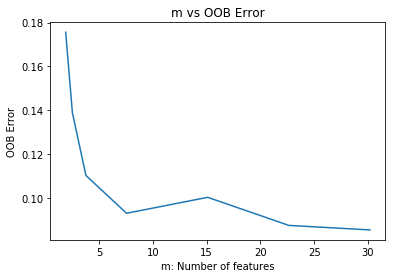

---------------------------------


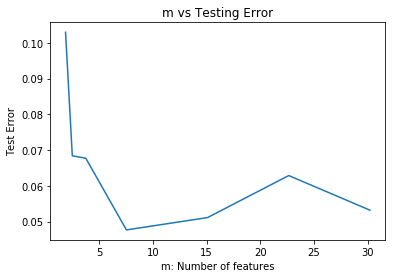

In [38]:
import matplotlib.pyplot as plt

plt.plot(m_vals, oobE)
plt.xlabel("m: Number of features")
plt.ylabel("OOB Error")
plt.title("m vs OOB Error")
plt.show()

print("---------------------------------")

plt.plot(m_vals, [1-x for x in acc_s])
plt.xlabel("m: Number of features")
plt.ylabel("Test Error")
plt.title("m vs Testing Error")
plt.show()